# Click to go to respective testing heading

<a href = "# Testing with 0 to 7" >  fast 0 to 7 Test </a>


<a href = "#Total-Number-of-Images-in-each-folder" >Total number of images in each folder</a>

<a href = "#All-Accuracies" >All accuracies</a>

<a href = "#Ground-Truth-&-Classification-Result" >Ground truth and classification result</a>

In [13]:
import tensorflow as tf
import numpy as np
import os

In [14]:
model = tf.keras.models.load_model("MP_None_Set.h5") # loading our pre-trained model

# Change path to dataset here ↓
img_dirs = [f"C:/Users/ASUS/Desktop/testing2/{i}" for i in range(9)]
img_dir_0, img_dir_1, img_dir_2, img_dir_3, img_dir_4, img_dir_5, img_dir_6, img_dir_7, img_dir_8 = img_dirs

# Declaring images in each folder and their ground truth as a list  
image_list_0, image_list_1, image_list_2, image_list_3, image_list_4, image_list_5, image_list_6, image_list_7, image_list_8 = [os.listdir(dir) for dir in img_dirs]

gnd_trt_0, gnd_trt_1, gnd_trt_2, gnd_trt_3, gnd_trt_4, gnd_trt_5, gnd_trt_6, gnd_trt_7, gnd_trt_8 = [i for i in range(9)]

In [15]:
def prediction(image_folder, image_list):
    pred = []

    # Loop through all the images in the folder and classify them
    for image_name in image_list:
    
        test_image = tf.keras.preprocessing.image.load_img(os.path.join(image_folder, image_name), target_size=(40, 40), color_mode='grayscale')
        test_image = np.expand_dims(test_image, axis=0) # Expand the dimensions of the image to match the input shape of the model
    
        result = model.predict(test_image)
    
        predicted_value = np.argmax(result[0])
    
        pred.append(predicted_value)
        
#         pred = ['None' if x == 8 else x for x in pred]
        
    return pred

In [16]:
def accuracy(gnd_trt, image_list, preds): # Accuracy calculation
    true_labels = [gnd_trt] * len(image_list)
    correct_predictions = sum(preds[i] == true_labels[i] for i in range(len(image_list)))
    accuracy_percent = (correct_predictions / len(true_labels)) * 100
    return accuracy_percent

# Testing with 0 to 7

In [17]:
preds_0 = prediction(img_dir_0, image_list_0)
preds_1 = prediction(img_dir_1, image_list_1)
preds_2 = prediction(img_dir_2, image_list_2)
preds_3 = prediction(img_dir_3, image_list_3)
preds_4 = prediction(img_dir_4, image_list_4)
preds_5 = prediction(img_dir_5, image_list_5)
preds_6 = prediction(img_dir_6, image_list_6)
preds_7 = prediction(img_dir_7, image_list_7)
preds_8 = prediction(img_dir_8, image_list_8)

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 13ms/step


## Total Number of Images in each folder

In [18]:
for i in range(9): # Hard coded, as we know the no of classes
    print(f"Total images in {i} : {len(locals()[f'image_list_{i}'])}")
    # locals() method returns a dictionary with all the local variables for the current program.

Total images in 0 : 200
Total images in 1 : 200
Total images in 2 : 200
Total images in 3 : 200
Total images in 4 : 200
Total images in 5 : 200
Total images in 6 : 200
Total images in 7 : 200
Total images in 8 : 200


## All Accuracies

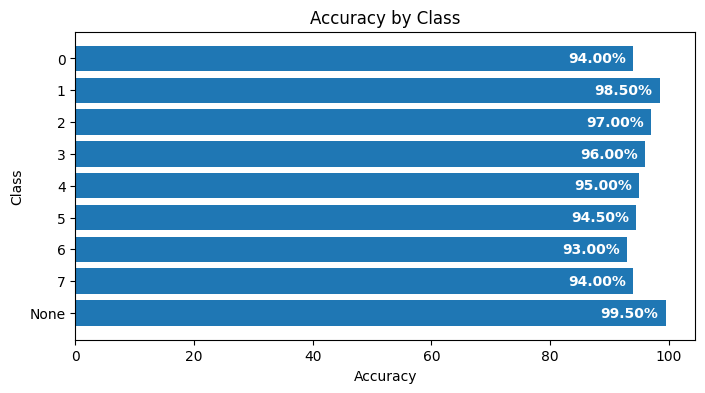

In [19]:
acc=[
accuracy(gnd_trt_0, image_list_0, preds_0),
accuracy(gnd_trt_1, image_list_1, preds_1),
accuracy(gnd_trt_2, image_list_2, preds_2),
accuracy(gnd_trt_3, image_list_3, preds_3),
accuracy(gnd_trt_4, image_list_4, preds_4),
accuracy(gnd_trt_5, image_list_5, preds_5),
accuracy(gnd_trt_6, image_list_6, preds_6),
accuracy(gnd_trt_7, image_list_7, preds_7),
accuracy(gnd_trt_8, image_list_8, preds_8),
]
    
import matplotlib.pyplot as plt    

labels = [f'{i}' for i in range(9)]
labels[8] = 'None'
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(labels, acc, align='center')

# Add axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Class')
ax.set_title('Accuracy by Class')

ax.invert_yaxis() # Invert y-axis to list classes from top to bottom

for i, acc in enumerate(acc):
    ax.text(acc -11, i, f'{acc:.2f}%', va='center',weight='bold',color='white')
plt.show()    

## Ground Truth & Classification Result

In [20]:
for i in range(9):
    print(f"Ground Truth: {locals()[f'gnd_trt_{i}']}\n\nClassified Values:\n{locals()[f'preds_{i}']}\n\n--------------------------------------------------------------------------------------------------------\n")

Ground Truth: 0

Classified Values:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0]

--------------------------------------------------------------------------------------------------------

Ground Truth: 1

Classified Values:
[1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [21]:
import numpy as np

# Initialize empty prediction arrays
pd = [[] for _ in range(9)]

# Loop over the classes
for i in range(9):
    # Get the length of the predictions for the current class
    pred_len = len(locals()[f'preds_{i}'])
    # Loop over the predictions and append the class label to the pd array
    for j in range(pred_len):
        pd[i].append(i)
    # Print the pd array and the corresponding ground truth for debugging
    print(pd[i])
    print(locals()[f'preds_{i}'])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
y_true = np.concatenate([pd[i] for i in range(9)])
y_pred = np.concatenate([preds_0,preds_1,preds_2,preds_3,preds_4,preds_5,preds_6,preds_7,preds_8])

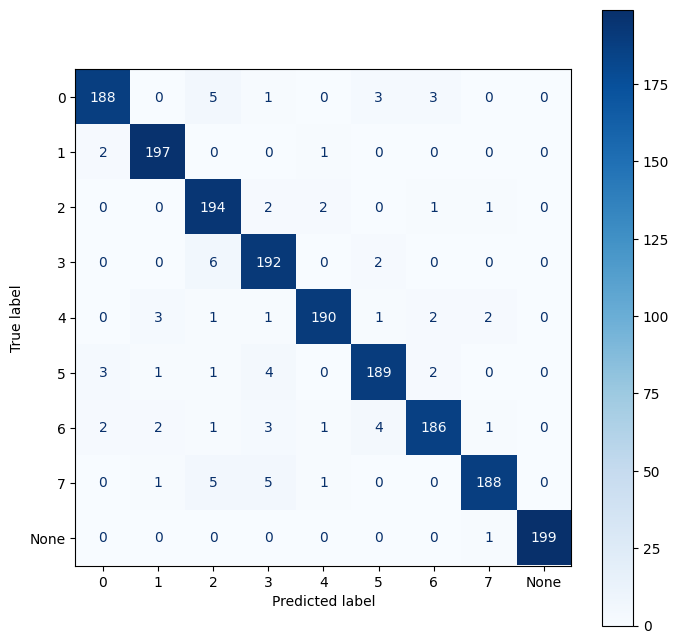

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', 'None']

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
fig = disp.ax_.get_figure() 
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()